**Question 1:**  What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each?

**Answer:** Difference between K-Means and Hierarchical Clustering

1. **Approach:**

K-Means: A partitioning method that divides data into K clusters by minimizing intra-cluster variance. It requires the number of clusters (K) to be specified in advance.

Hierarchical Clustering: A hierarchical method that builds a tree-like structure (dendrogram) of clusters, either by merging smaller clusters (agglomerative) or splitting larger ones (divisive). No need to pre-specify K.

2. **Output:**

K-Means: Provides a fixed set of clusters with cluster centroids.

Hierarchical Clustering: Provides a dendrogram showing multiple levels of clustering, allowing the user to “cut” the tree at different levels for different numbers of clusters.

3. **Scalability:**

K-Means: Scales well to large datasets because it is computationally efficient.

Hierarchical Clustering: Works better for small to medium datasets since it has higher computational complexity (O(n²)).

4. **Cluster Shape Assumption:**

K-Means: Works best when clusters are roughly spherical and of similar size.

Hierarchical Clustering: More flexible, can capture clusters of different shapes and sizes.

Use Cases
K-Means Use Case:
Market segmentation for an e-commerce company to group customers into segments (e.g., high-value, discount-seekers, casual buyers) based on purchase history. Efficient for millions of customer records.

Hierarchical Clustering Use Case:
Document or gene expression analysis, where the goal is to explore relationships and nested clusters. Researchers can view the dendrogram to understand how closely related different genes or documents are.  

**Question 2:** Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

**Answer:** Silhouette Score in Clustering

The Silhouette Score is a metric used to evaluate the quality of clusters formed by a clustering algorithm. It measures how well each data point fits within its assigned cluster compared to other clusters.

Formula (conceptual):
For a given data point i:

𝑎
(
𝑖
)
a(i) = average distance between i and all other points in the same cluster (cohesion).

𝑏
(
𝑖
)
b(i) = minimum average distance from i to all points in another cluster (separation).

Silhouette score for i:

𝑠
(
𝑖
)
=
𝑏
(
𝑖
)
−
𝑎
(
𝑖
)
max
⁡
(
𝑎
(
𝑖
)
,
𝑏
(
𝑖
)
)
s(i)=
max(a(i),b(i))
b(i)−a(i)
	​


Range:

𝑠
(
𝑖
)
s(i) ranges from -1 to +1

+1 → Well-clustered (close to its own cluster, far from others).

0 → On or near the decision boundary between clusters.

-1 → Possibly misclassified (closer to another cluster than its own).

Purpose:

To evaluate cluster cohesion (how tightly grouped points are within the same cluster).

To evaluate cluster separation (how well clusters are apart from each other).

To compare clustering results for different values of K or different algorithms and pick the optimal one.

Example Use Case:
When performing customer segmentation with K-Means, you can calculate the Silhouette Score for different numbers of clusters (K=2,3,4,...) and choose the K with the highest average score, ensuring the best balance of cohesion and separation.

**Question 3:** What are the core parameters of DBSCAN, and how do they influence the clustering process?

**Answer:**  Core Parameters of DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

1. eps (Epsilon radius):
Defines the maximum distance between two points for them to be considered neighbors.
Influence:
Small eps → Many small clusters (or noise points).
Large eps → Fewer, larger clusters (risk of merging distinct clusters).

2. min_samples:
Minimum number of points required within the eps neighborhood for a point to be considered a core point.
Influence:
Low min_samples (e.g., 2–3) → More clusters, may include noise as clusters.
High min_samples → Fewer clusters, stricter definition of dense areas, more points labeled as noise.
Rule of thumb: Often set to D+1, where D = number of dimensions.

3. (Optional) metric:
Defines the distance function used (default = Euclidean).
Changing it (e.g., Manhattan, cosine similarity) influences how neighborhoods are computed.
How They Work Together
Core point: A point with at least min_samples neighbors within distance eps.
Border point: A point within eps of a core point but with fewer than min_samples neighbors.
Noise point: A point that is neither a core nor a border point.

Thus:
eps controls how close points need to be to be in the same cluster.
min_samples controls how dense a region must be to form a cluster.
Example Use Case
DBSCAN in anomaly detection: In credit card fraud detection, legitimate transactions form dense clusters, while fraud cases are sparse → DBSCAN marks them as noise.

**Question 4:** Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

**Answer:** Why Feature Scaling is Important in Clustering

Clustering algorithms like K-Means and DBSCAN rely heavily on distance metrics (usually Euclidean distance). If features are on very different scales, those with larger numeric ranges will dominate the distance calculation, leading to biased clusters.

1. K-Means

K-Means assigns points to clusters by minimizing the Euclidean distance to cluster centroids.

Example:

Suppose we cluster people by age (20–70 years) and income (20,000–200,000).

Without scaling, the income range (200k) will dominate over age (50), making clusters reflect mostly income, ignoring age.

✅ After scaling (e.g., standardization or min-max normalization), both features contribute fairly.

2. DBSCAN

DBSCAN uses eps (neighborhood radius) based on distances.

If one feature has a much larger scale, the distance measure will be skewed, and the algorithm may fail to detect true dense clusters.

✅ With scaled features, DBSCAN can form clusters that reflect real structure in the data.

Common Scaling Methods

Standardization (Z-score scaling):

𝑥
′
=
𝑥
−
𝜇
𝜎
x
′
=
σ
x−μ
	​


Centers data at mean 0, variance 1. Good for Gaussian-like features.

Min-Max Normalization:

𝑥
′
=
𝑥
−
𝑥
𝑚
𝑖
𝑛
𝑥
𝑚
𝑎
𝑥
−
𝑥
𝑚
𝑖
𝑛
x
′
=
x
max
	​

−x
min
	​

x−x
min
	​
Scales all features to [0, 1]. Useful when you want uniform bounded values.

**Question 5:** What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

**Answer:**
Elbow Method in K-Means Clustering
What it is:

The Elbow Method is a heuristic used to determine the optimal number of clusters (K) in K-Means clustering.

It works by running K-Means for different values of K and calculating the Within-Cluster Sum of Squares (WCSS), also called inertia:

𝑊
𝐶
𝑆
𝑆
=
∑
𝑘
=
1
𝐾
∑
𝑥
𝑖
∈
𝐶
𝑘
∥
𝑥
𝑖
−
𝜇
𝑘
∥
2
WCSS=
k=1
∑
K
	​

x
i
	​

∈C
k
	​

∑
	​

∥x
i
	​

−μ
k
	​

∥
2

where:

𝑥
𝑖
x
i
	​

 = data points

𝜇
𝑘
μ
k
	​

 = centroid of cluster
𝐶
𝑘
C
k
​
How it helps:

As K increases, WCSS always decreases (more clusters = tighter groups).
But beyond a certain point, the marginal improvement becomes small.
The “elbow point” (where the curve bends) represents the best trade-off between:
Having too few clusters (underfitting)
Having too many clusters (overfitting / unnecessary complexity)
Steps to Use the Elbow Method:
Run K-Means for a range of K values (e.g., 1 to 10).
Compute WCSS (inertia) for each K.
Plot K vs. WCSS.
Look for the elbow (sharp bend) in the curve → optimal K.
Example Use Case:
In customer segmentation, you might test K=2 to K=10. If the elbow occurs at K=4, it suggests 4 distinct customer groups (e.g., budget shoppers, loyal buyers, premium customers, and occasional visitors).

✅ In short:
The Elbow Method helps select the number of clusters by finding the point where adding more clusters does not significantly reduce the within-cluster variance.

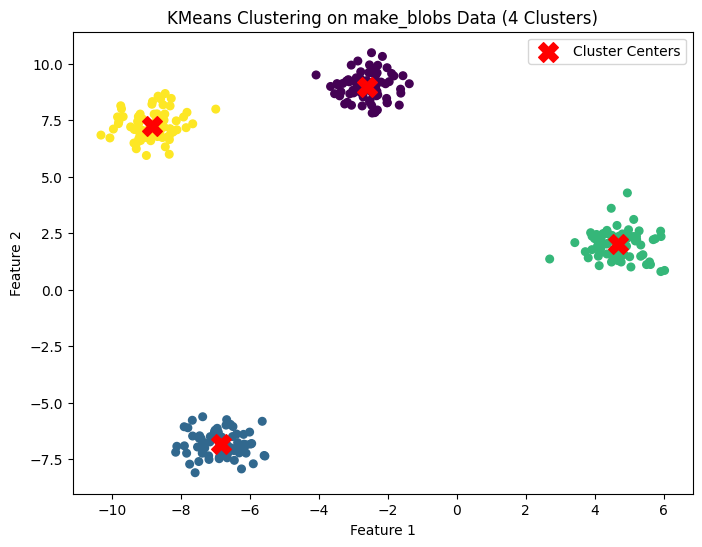

In [1]:
##Dataset: Use make_blobs, make_moons, and sklearn.datasets.load_wine() as specified. Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers. (Include your Python code and output in the code box below.) #

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply KMeans clustering (K=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Step 3: Visualize results with cluster centers
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')  # data points
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Cluster Centers')  # centroids
plt.title("KMeans Clustering on make_blobs Data (4 Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [2]:
#Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise). #

# Import required libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN clustering
# Parameters tuned for Wine dataset
dbscan = DBSCAN(eps=2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count clusters (excluding noise labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found (excluding noise):", n_clusters)


Number of clusters found (excluding noise): 5


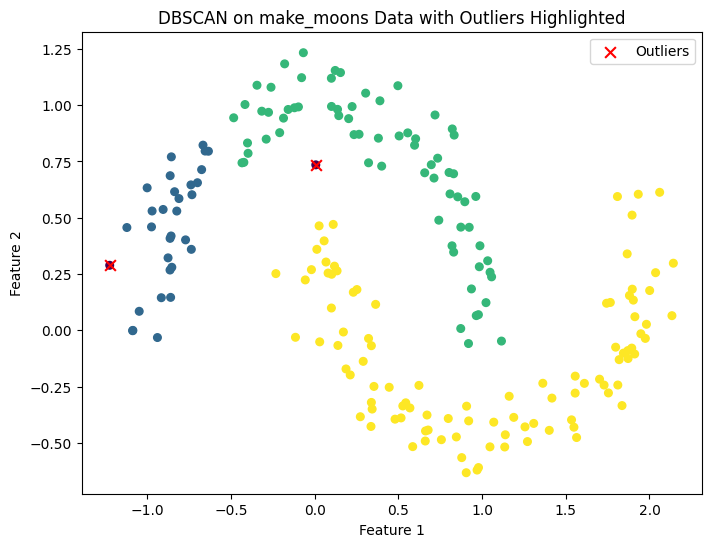

In [3]:
#Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot. #

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Step 1: Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Plot results
plt.figure(figsize=(8,6))

# Plot data points with cluster labels
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=30)

# Highlight outliers (label = -1) in red with 'x' marker
outliers = labels == -1
plt.scatter(X[outliers, 0], X[outliers, 1],
            c='red', s=60, marker='x', label='Outliers')

plt.title("DBSCAN on make_moons Data with Outliers Highlighted")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


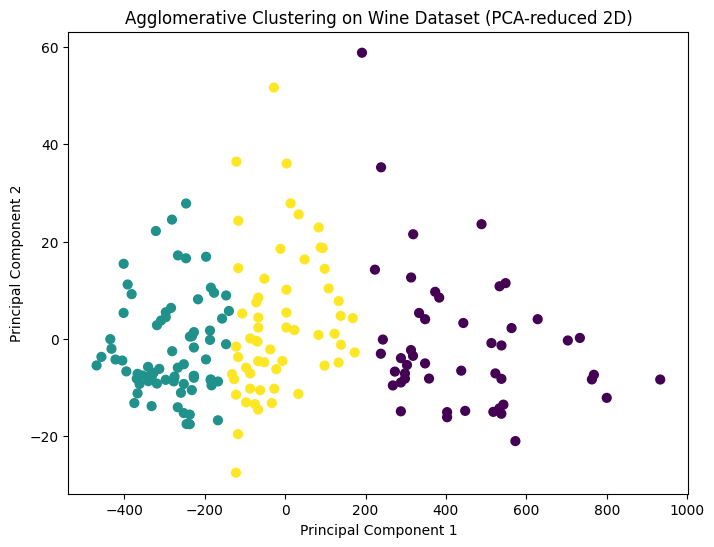

In [4]:
#Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot. (Include your Python code and output in the code box below.) #

# Import required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data

# Step 2: Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Apply Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)  # Wine dataset has 3 classes
labels = agg_clust.fit_predict(X_pca)

# Step 4: Visualize the results
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=40)
plt.title("Agglomerative Clustering on Wine Dataset (PCA-reduced 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


**Question 10:** You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories. Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis? (Include your Python code and output in the code box below.)

**Answer:**
Clustering Workflow for Customer Segmentation
1. **Choice of Clustering Algorithm(s):**
K-Means: Good for large datasets, easy to interpret, and efficient when clusters are spherical and balanced.
DBSCAN: Useful if we suspect irregularly shaped clusters or want to identify outliers (e.g., very unusual customers).
Agglomerative Clustering: Helps visualize customer hierarchy and relationships using dendrograms.
👉 I would start with K-Means (scalable, interpretable), and validate with silhouette score or elbow method.

2. **Data Preprocessing**
Handle missing values: Impute numerical values with mean/median, categorical with mode (or drop if sparse).
Encoding: Convert categorical demographics (e.g., gender, region) using one-hot encoding.
Scaling: Use StandardScaler or MinMaxScaler so that purchase amounts, age, and other features contribute equally to clustering.

3. **Determining the Number of Clusters**
Use the Elbow Method (plot inertia vs. K).
Use the Silhouette Score for validation.

4. **Business Impact (Marketing Team Benefits)**
Targeted promotions: Each cluster corresponds to a customer segment (e.g., high-value premium buyers, discount seekers, one-time shoppers).
Personalized marketing: Send tailored offers to specific clusters → improves conversion.
Customer retention: Identify churn-prone groups and design retention campaigns.

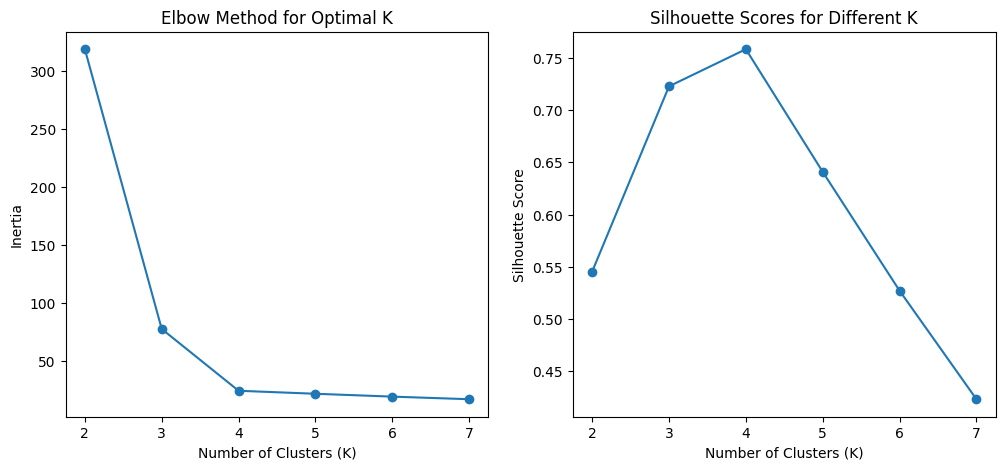

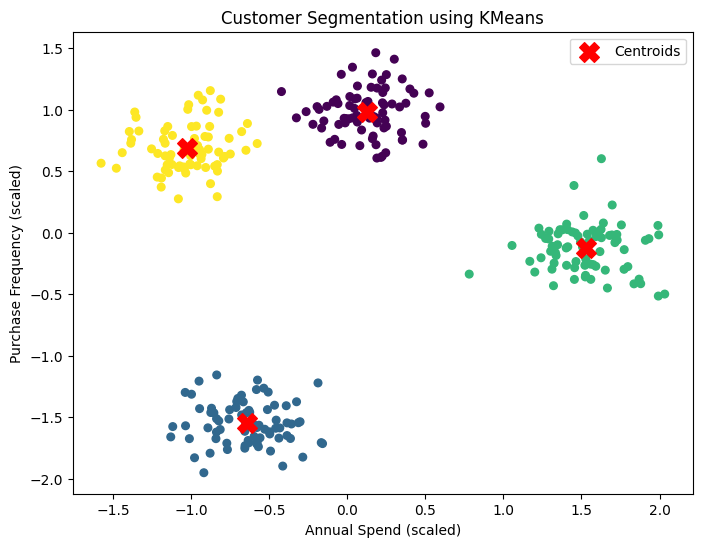

         Annual_Spend  Purchase_Frequency
Cluster                                  
0           -2.733279            8.967312
1           -6.822897           -6.820527
2            4.733870            2.055522
3           -8.880621            7.144796


In [5]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Step 1: Simulate customer data (demographics + purchase behavior)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.2, random_state=42)
data = pd.DataFrame(X, columns=["Annual_Spend", "Purchase_Frequency"])

# Step 2: Preprocess - scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Step 3: Find optimal number of clusters (Elbow method + Silhouette)
inertias = []
sil_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow Method
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")

# Plot Silhouette Scores
plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, marker='o')
plt.title("Silhouette Scores for Different K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")

plt.show()

# Step 4: Train final KMeans model with chosen K (say K=4)
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(X_scaled)

# Step 5: Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels_final, cmap='viridis', s=30)
plt.scatter(kmeans_final.cluster_centers_[:,0], kmeans_final.cluster_centers_[:,1],
            c='red', s=200, marker='X', label="Centroids")
plt.title("Customer Segmentation using KMeans")
plt.xlabel("Annual Spend (scaled)")
plt.ylabel("Purchase Frequency (scaled)")
plt.legend()
plt.show()

# Print cluster summary
data['Cluster'] = labels_final
print(data.groupby('Cluster').mean())
